## VADER more sentiment analysis 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import re

from nltk.sentiment.vader import SentimentIntensityAnalyzer


# easier to see full text with a bigger maxwidth:
pd.options.display.max_colwidth = 200

For teachers group

In [2]:
df = pd.read_csv('../data/teacher_combine_50.csv')
df.dropna(inplace = True)
df.head()

,subreddit,id,selftext,title,num_comments,created_utc,parent_id,link_id,author,body,all_text
0,Teachers,u35imn,"I teach 8th grade at a private school in Ontario. About a month ago, some of the students in my class came to me to talk about the behaviours of some of their classmates on social media and more s...",LGBT teacher with no admin support in traditional private school,0.0,1649898781,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"I teach 8th grade at a private school in Ontario. About a month ago, some of the students in my class came to me to talk about the behaviours of some of their classmates on social media and more s..."
1,Teachers,u35g5w,[removed],Please Help,0.0,1649898562,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"[removed], fromsubmission, Please Help"
2,Teachers,u35fe3,For some context I'm teaching US history. \n\nTo give a good sense of who this kid is try to imagine someone who has spent too much time on Reddit and doesn't know how to moderate their views. \n\...,"I got that kid that won't stop being ""that kid"".",0.0,1649898496,fromsubmission,fromsubmission,fromsubmission,fromsubmission,For some context I'm teaching US history. \n\nTo give a good sense of who this kid is try to imagine someone who has spent too much time on Reddit and doesn't know how to moderate their views. \n\...
3,Teachers,u35668,I am a middle school coding teacher. I’m wondering if I can use the ~$325 I am afforded from classwallet to be reimbursed for an oculus quest 2.,Can I use class wallet to buy an oculus?,0.0,1649897706,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"I am a middle school coding teacher. I’m wondering if I can use the ~$325 I am afforded from classwallet to be reimbursed for an oculus quest 2., fromsubmission, Can I use class wallet to buy an o..."
4,Teachers,u353wr,"A student turned in their essay (which we worked on for 2 weeks) with paragraphs copy-pasted from Wikipedia…with the hyperlinks still active. When I gave the student a 0, they immediately messaged...",Plagiarism &amp; Parents,0.0,1649897510,fromsubmission,fromsubmission,fromsubmission,fromsubmission,"A student turned in their essay (which we worked on for 2 weeks) with paragraphs copy-pasted from Wikipedia…with the hyperlinks still active. When I gave the student a 0, they immediately messaged..."


In [3]:
df.isnull().sum()

subreddit       0
id              0
selftext        0
title           0
num_comments    0
created_utc     0
parent_id       0
link_id         0
author          0
body            0
all_text        0
dtype: int64

In [4]:
df.shape

(9960, 11)

In [5]:
df_vader = df[['all_text']]

In [6]:
df_vader.head()

,all_text
0,"I teach 8th grade at a private school in Ontario. About a month ago, some of the students in my class came to me to talk about the behaviours of some of their classmates on social media and more s..."
1,"[removed], fromsubmission, Please Help"
2,For some context I'm teaching US history. \n\nTo give a good sense of who this kid is try to imagine someone who has spent too much time on Reddit and doesn't know how to moderate their views. \n\...
3,"I am a middle school coding teacher. I’m wondering if I can use the ~$325 I am afforded from classwallet to be reimbursed for an oculus quest 2., fromsubmission, Can I use class wallet to buy an o..."
4,"A student turned in their essay (which we worked on for 2 weeks) with paragraphs copy-pasted from Wikipedia…with the hyperlinks still active. When I gave the student a 0, they immediately messaged..."


Remove URLs

In [7]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [8]:
df_vader['all_text'].apply(lambda text: remove_urls(text))
df_vader.head(2)

,all_text
0,"I teach 8th grade at a private school in Ontario. About a month ago, some of the students in my class came to me to talk about the behaviours of some of their classmates on social media and more s..."
1,"[removed], fromsubmission, Please Help"


Lowercase

In [39]:
import nltk
from nltk.corpus import stopwords

In [40]:
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
df_vader['all_text'] = df_vader['all_text'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [16]:
df_vader.head()

,all_text
0,"teach 8th grade private school ontario. month ago, students class came talk behaviours classmates social media specifically, discord. informed several students class group chat together talk homop..."
1,"[removed], fromsubmission, please help"
2,context i'm teaching us history. give good sense kid try imagine someone spent much time reddit know moderate views. cant tell hints hot button issues class making derogatory remarks president. wh...
3,"middle school coding teacher. i’m wondering use ~$325 afforded classwallet reimbursed oculus quest 2., fromsubmission, use class wallet buy oculus?"
4,"student turned essay (which worked 2 weeks) paragraphs copy-pasted wikipedia…with hyperlinks still active. gave student 0, immediately messaged ask boldly tried tell wrong “everyone [their] table ..."


In [17]:
def remove_nums(text):
    text_nonum = re.sub(r'\d+', '', text)
    return text_nonum

In [18]:
df_vader['all_text'] = df_vader['all_text'].apply(lambda text: remove_nums(text))
df_vader.head()

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15469/1255113691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].apply(lambda text: remove_nums(text))


,all_text
0,"teach th grade private school ontario. month ago, students class came talk behaviours classmates social media specifically, discord. informed several students class group chat together talk homoph..."
1,"[removed], fromsubmission, please help"
2,context i'm teaching us history. give good sense kid try imagine someone spent much time reddit know moderate views. cant tell hints hot button issues class making derogatory remarks president. wh...
3,"middle school coding teacher. i’m wondering use ~$ afforded classwallet reimbursed oculus quest ., fromsubmission, use class wallet buy oculus?"
4,"student turned essay (which worked weeks) paragraphs copy-pasted wikipedia…with hyperlinks still active. gave student , immediately messaged ask boldly tried tell wrong “everyone [their] table sa..."


Remove Punctuation

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuation(text):
    if(type(text)==float):
        return text
    ans=""  
    for i in text:     
        if i not in string.punctuation:
            ans+=i    
    return ans

In [21]:
df_vader['all_text'] = df_vader['all_text'].apply(lambda x:remove_punctuation(x))

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15469/2792472258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].apply(lambda x:remove_punctuation(x))


In [22]:
df_vader.head()

,all_text
0,teach th grade private school ontario month ago students class came talk behaviours classmates social media specifically discord informed several students class group chat together talk homophobic...
1,removed fromsubmission please help
2,context im teaching us history give good sense kid try imagine someone spent much time reddit know moderate views cant tell hints hot button issues class making derogatory remarks president which ...
3,middle school coding teacher i’m wondering use afforded classwallet reimbursed oculus quest fromsubmission use class wallet buy oculus
4,student turned essay which worked weeks paragraphs copypasted wikipedia…with hyperlinks still active gave student immediately messaged ask boldly tried tell wrong “everyone their table saw them ...


Lemmatize

In [23]:
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [24]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df_vader['all_text'] = df_vader['all_text'].apply(lambda text: lemmatize_words(text))
df_vader.head()

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15469/1666236005.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].apply(lambda text: lemmatize_words(text))


,all_text
0,teach th grade private school ontario month ago student class came talk behaviour classmate social medium specifically discord informed several student class group chat together talk homophobic ho...
1,removed fromsubmission please help
2,context im teaching u history give good sense kid try imagine someone spent much time reddit know moderate view cant tell hint hot button issue class making derogatory remark president which whate...
3,middle school coding teacher i’m wondering use afforded classwallet reimbursed oculus quest fromsubmission use class wallet buy oculus
4,student turned essay which worked week paragraph copypasted wikipedia…with hyperlink still active gave student immediately messaged ask boldly tried tell wrong “everyone their table saw them work”...


In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [26]:
df_vader['all_text'] = df_vader['all_text'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))

/var/folders/hs/t80s044s7wqd1y702m9d9zm00000gn/T/ipykernel_15469/4124399545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vader['all_text'] = df_vader['all_text'].str.lower().apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))


In [27]:
df_vader.head()

,all_text
0,teach th grade private school ontario month ago student class came talk behaviour classmate social medium specifically discord informed several student class group chat together talk homophobic ho...
1,removed fromsubmission please help
2,context im teaching u history give good sense kid try imagine someone spent much time reddit know moderate view cant tell hint hot button issue class making derogatory remark president whatever fr...
3,middle school coding teacher i’m wondering use afforded classwallet reimbursed oculus quest fromsubmission use class wallet buy oculus
4,student turned essay worked week paragraph copypasted wikipedia…with hyperlink still active gave student immediately messaged ask boldly tried tell wrong “everyone table saw work” took video scrol...


In [28]:
corpus = list(df_vader['all_text'])
corpus[:10]

['teach th grade private school ontario month ago student class came talk behaviour classmate social medium specifically discord informed several student class group chat together talk homophobic homophobic want talk shown screenshots conversation comment student included gay gross cant straight hard well comment transgender identity real trans people mentally ill get picture school work traditional offer sex ed form ever discussed pansexual ci married nonbinary trans masc person told total three staff member sexuality relationship honestly feel job went vice principal also happens someone considered friend one people mentioned really upset emotional went support discus deal situation response basically tell get involved could tell careful probably knew would go well parent school owner open conversation class told try take personally tried explain fact gay get make attempt try understand saying dealing feeling guilt long time guilt toward partner community going work every day knowing

In [29]:
#instantiate SIA

sia = SentimentIntensityAnalyzer()

#Get polarity scores for the first tweet

sia.polarity_scores(corpus[0])

{'neg': 0.129, 'neu': 0.752, 'pos': 0.119, 'compound': -0.4611}

In [30]:
sentiment = []    

for text in corpus:
    scores = sia.polarity_scores(text)
    scores['text'] = text
    sentiment.append(scores)

df = pd.DataFrame(sentiment)
df.head()

,neg,neu,pos,compound,text
0,0.129,0.752,0.119,-0.4611,teach th grade private school ontario month ago student class came talk behaviour classmate social medium specifically discord informed several student class group chat together talk homophobic ho...
1,0.000,0.286,0.714,0.6124,removed fromsubmission please help
2,0.131,0.681,0.188,0.8940,context im teaching u history give good sense kid try imagine someone spent much time reddit know moderate view cant tell hint hot button issue class making derogatory remark president whatever fr...
3,0.000,1.000,0.000,0.0000,middle school coding teacher i’m wondering use afforded classwallet reimbursed oculus quest fromsubmission use class wallet buy oculus
4,0.108,0.620,0.272,0.9705,student turned essay worked week paragraph copypasted wikipedia…with hyperlink still active gave student immediately messaged ask boldly tried tell wrong “everyone table saw work” took video scrol...


In [31]:
sent_df = df.drop(columns = ['text'])

In [32]:
sent_df.head(10)

,neg,neu,pos,compound
0,0.129,0.752,0.119,-0.4611
1,0.000,0.286,0.714,0.6124
2,0.131,0.681,0.188,0.8940
3,0.000,1.000,0.000,0.0000
4,0.108,0.620,0.272,0.9705
5,0.175,0.663,0.162,-0.7842
6,0.175,0.825,0.000,-0.1779
7,0.218,0.558,0.223,0.0516
8,0.052,0.607,0.341,0.9652
9,0.195,0.805,0.000,-0.1779


In [33]:
sent_df.describe()

,neg,neu,pos,compound
count,9960.000000,9960.000000,9960.000000,9960.000000
mean,0.100511,0.731085,0.168399,0.211534
std,0.114115,0.160521,0.138963,0.591883
min,0.000000,0.162000,0.000000,-0.999200
25%,0.000000,0.626000,0.059000,-0.177900
50%,0.074000,0.723000,0.157000,0.296000
75%,0.161000,0.831000,0.247000,0.765000
max,0.778000,1.000000,0.796000,0.999500


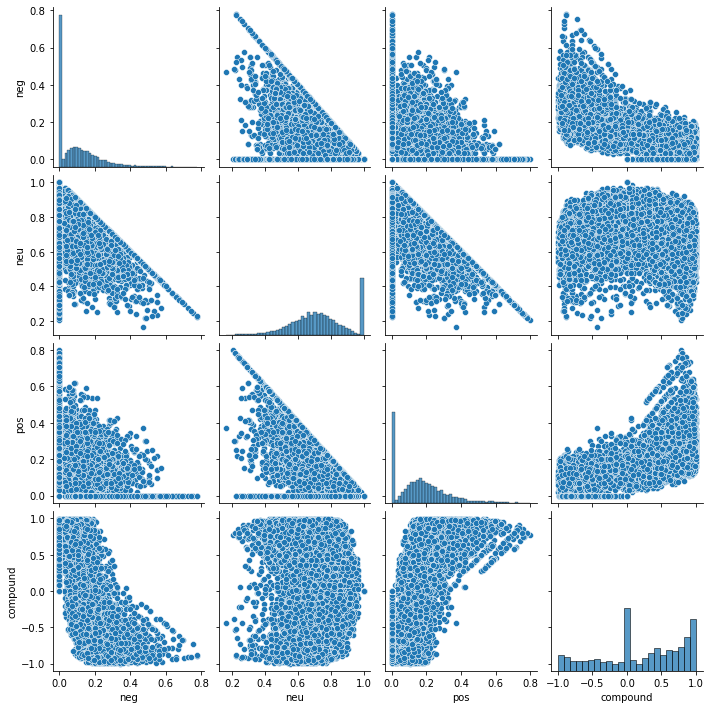

In [34]:
sns.pairplot(sent_df);